# Imports

In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Data Files

In [69]:
import glob

# Find all text files starting with "lout"
fileList = glob.glob("lout*.txt") 

# Organize the data into arrays
dataArr = []
for file in fileList:
    _, tnum, pbc, N, gam = file.split("-")
    tnum, pbc, N, gam = int(tnum), int(pbc), int(N), float(gam[:-4])

    data = np.loadtxt(file)

    dataArr += [(tnum, pbc, N, gam, data.T)]


# Get time data
with open("time.txt", "r") as file:
    text = file.read().split("\n")
    text = [item for item in text if len(item) > 2]

tt, rr, uu = [], [], []
for index in range(len(text) // 4):
    index *= 4
    tt += [int(text[index].split("=")[-1])]
    rr += [float(text[index + 1].split("m")[-1][:-1])]
    uu += [float(text[index + 2].split("m")[-1][:-1])]

rr = np.array(rr)

# Problem 1

In [70]:
def plotAll(dataArr: list, cols: int) -> None:
    # Needed number of columns
    rows = (2 * len(dataArr)) // cols + 1

    plt.figure(figsize=(cols * 6, rows * 4))
    for index, item in enumerate(dataArr):
        # Getting data
        tnum, pbc, N, gam, data = item

        # Splice data
        ee = data[0, :]
        ldos = data[1:N+1, :]
        ldose = data[N+1:, :]

        # Plotting
        plt.subplot(rows, cols, 2 * index + 1)
        plt.title(f"Calculated LDOS for $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
        plt.imshow(ldos, extent = [ee[0], ee[len(ee) - 1], 0, N-1], origin='lower', cmap='jet', aspect='auto')
        plt.xlabel("$\\varepsilon / t$")
        plt.ylabel("$n$")
        plt.colorbar()

        plt.subplot(rows, cols, 2 * index + 2)
        plt.title(f"Exact LDOS for $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
        plt.imshow(ldose, extent = [ee[0], ee[len(ee) - 1], 0, N-1], origin='lower', cmap='jet', aspect='auto')
        plt.xlabel("$\\varepsilon / t$")
        plt.ylabel("$n$")
        plt.colorbar()

        # Analysis
        # print(f"Analysis for N = {N}, gamma = {gam} and {'p.' if pbc else 'o.'}b.c.")
        # print(f"Maximum difference is {np.max(np.abs(data[1, :] - data[2, :]))}")
        # print(f"Average difference is {np.mean(data[1, :] - data[2, :])}")
        # print(f"Std of difference is {np.std(data[1, :] - data[2, :])}")
        # print("\n\n")    

    plt.subplots_adjust(hspace=0.35)
    plt.show()

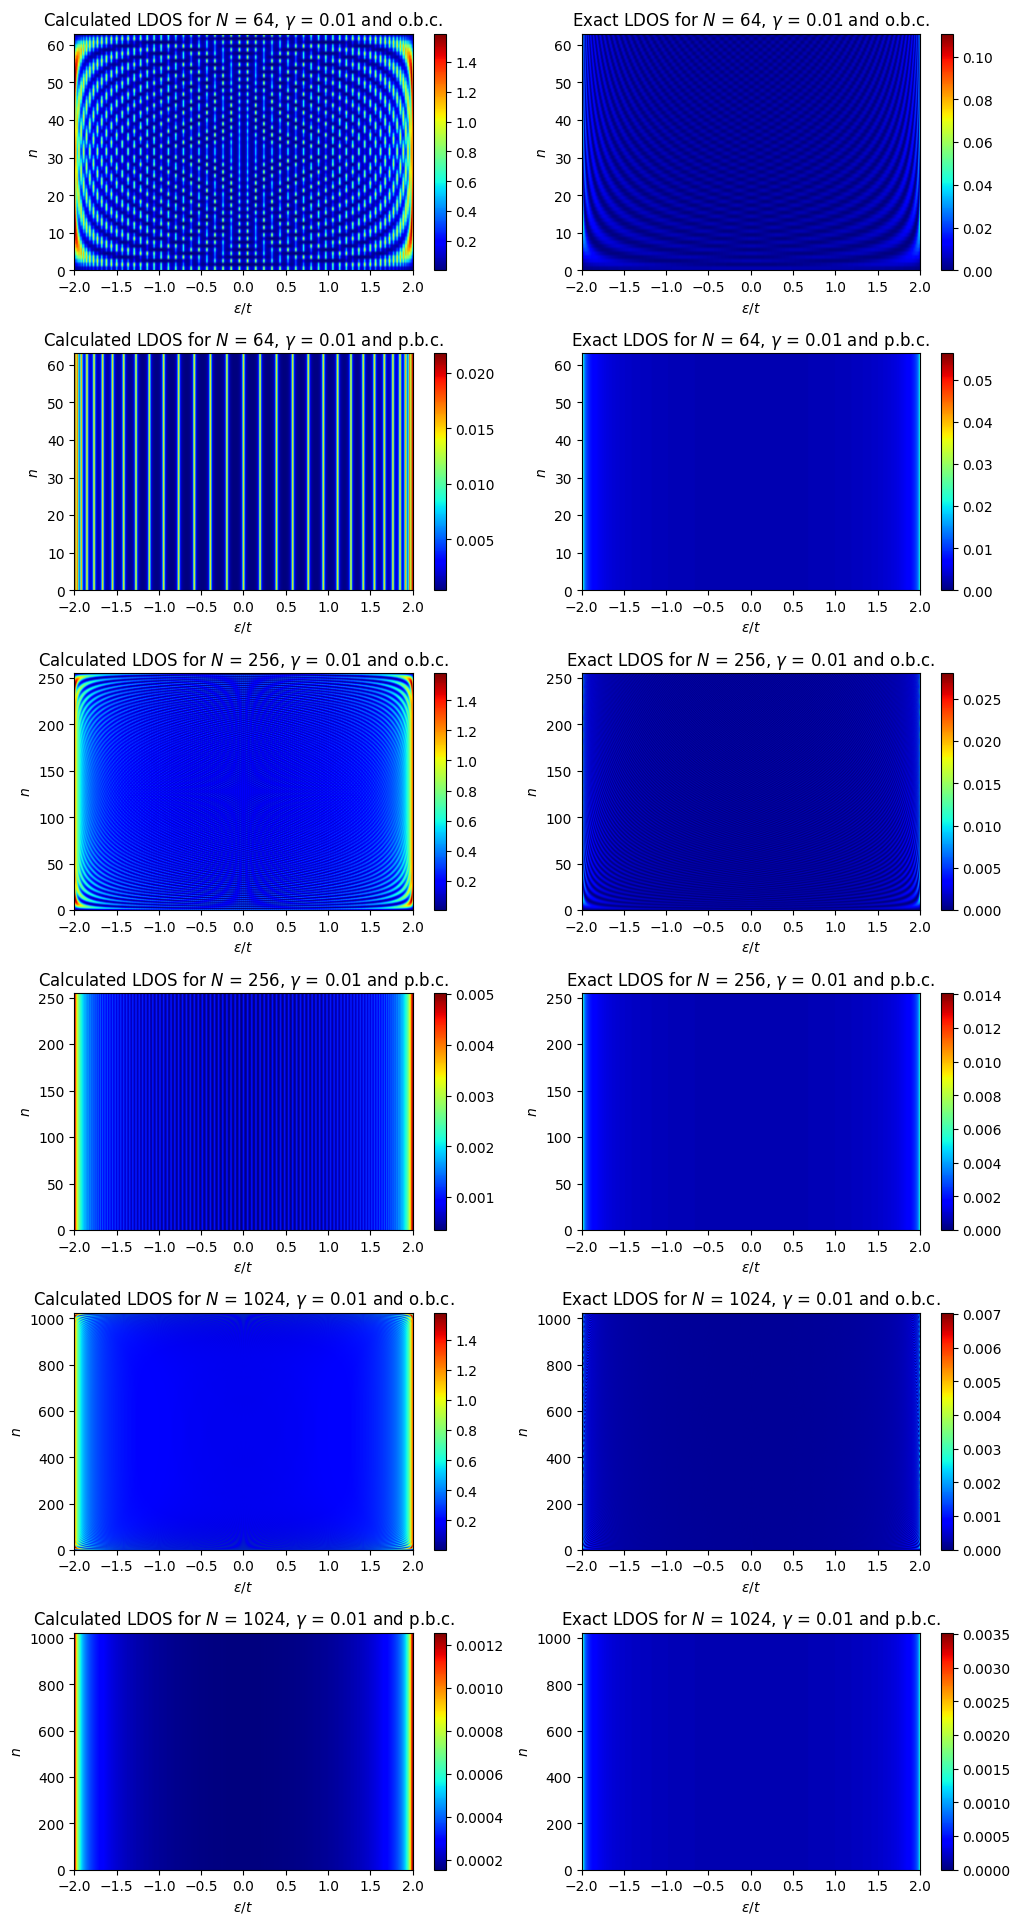

In [71]:
plotAll(dataArr, 2)

In [80]:
def plotAllSlice(dataArr: list, cols: int, eps: list[float] = [0.01, 0.5, 0.99]) -> None:
    # Needed number of columns
    rows = (2 * len(eps) * len(dataArr)) // cols + 1

    plt.figure(figsize=(cols * 6, rows * 4))
    for index, item in enumerate(dataArr):
        # Getting data
        tnum, pbc, N, gam, data = item

        # Splice data
        ee = data[0, :]
        nn = np.arange(N)
        ldos = data[1:N+1, :]
        ldose = data[N+1:, :]

        # Desired indexes
        ii = np.floor(len(ee) * np.array(eps))

        for plotindex, eeindex in enumerate(ii):
            eeindex = int(eeindex)

            # Plotting
            plt.subplot(rows, cols, 2 * len(eps) * index + 2 * plotindex + 1)
            plt.title(f"Calculated LDOS for eps = {ee[eeindex]}, $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
            plt.plot(nn/N, ldos[:, eeindex])
            plt.xlabel("$n/N$")
            plt.ylabel("$LDOS$")

            plt.subplot(rows, cols, 2 * len(eps) * index + 2 * plotindex + 2)
            plt.title(f"Exact LDOS for eps = {ee[eeindex]}, $N$ = {N}, $\\gamma$ = {gam} and {'p.' if pbc else 'o.'}b.c.")
            plt.plot(nn/N, ldose[:, eeindex])
            plt.xlabel("$n/N$")
            plt.ylabel("$LDOS$")

        # Analysis
        # print(f"Analysis for N = {N}, gamma = {gam} and {'p.' if pbc else 'o.'}b.c.")
        # print(f"Maximum difference is {np.max(np.abs(data[1, :] - data[2, :]))}")
        # print(f"Average difference is {np.mean(data[1, :] - data[2, :])}")
        # print(f"Std of difference is {np.std(data[1, :] - data[2, :])}")
        # print("\n\n")    

    plt.subplots_adjust(hspace=0.35, wspace=0.4)
    plt.show()

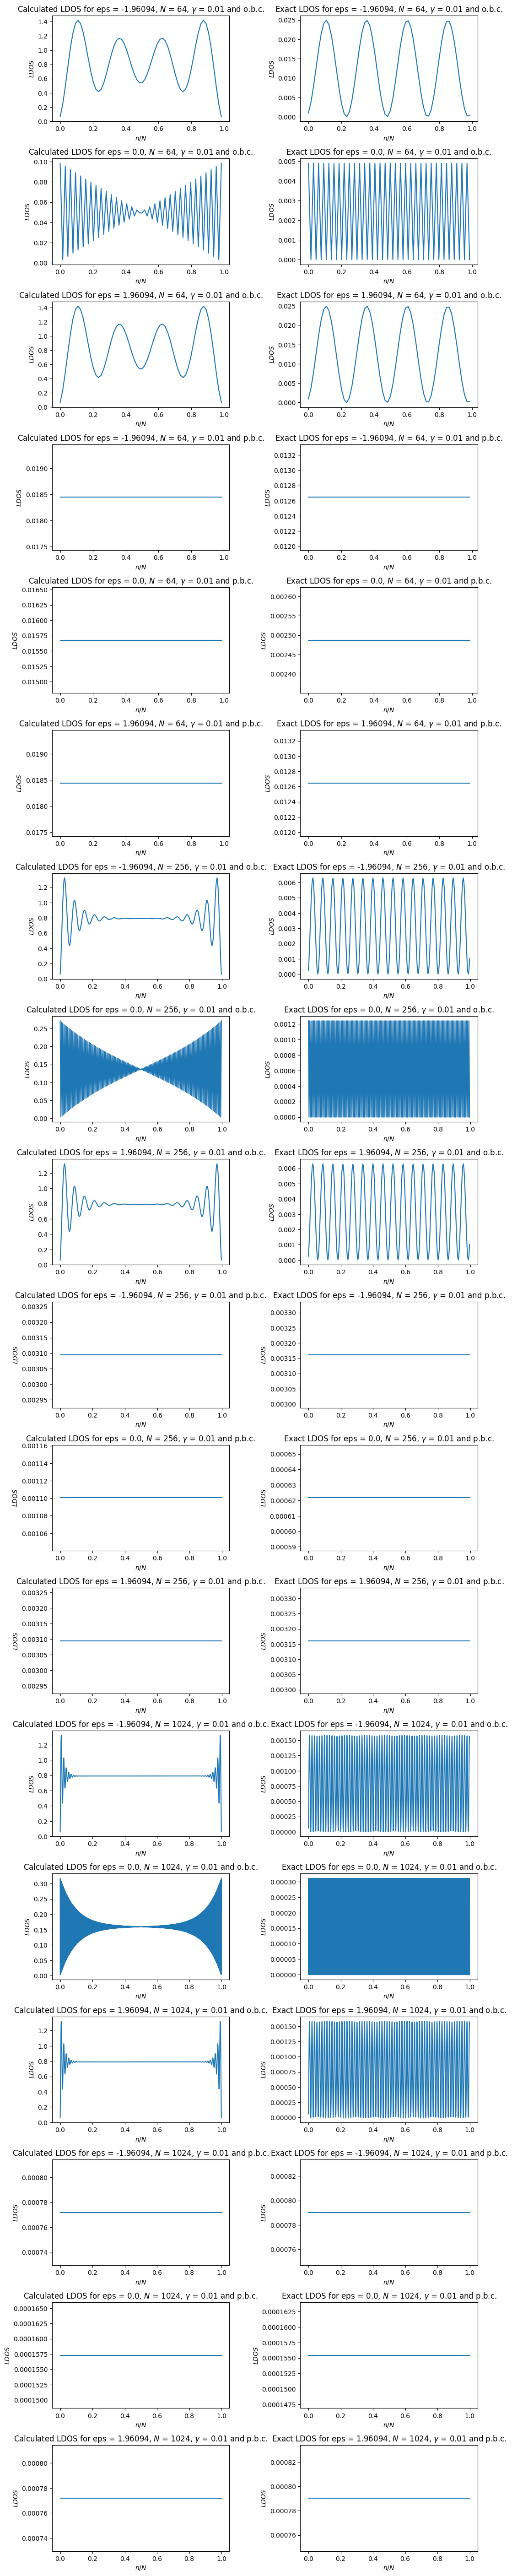

In [81]:
plotAllSlice(dataArr, 2)